# Project: WeRateDogs Data Analysis
## Introduction
> In This Project, I will be working with the WeRateDogs rating dataset which will be gathered from the three sources, then cleaned and merged. The Dataset is one that contains a lot of review data from the famous WeRateDogs Twitter archive. It contains so many interesting fields such as the text in the tweet, the time the tweet was released, the rating of the dogs in the tweet, the dog predictions and so much more.
The aim of this project is to analyze the dataset and look at how predicted breed and time affect the favorite count.

## Research Questions:
- What are the top 3 most used languages?
- What are the top 5 most common ratings?
- Which source text has the most retweets?
- How did the retweet count and favorite count improve over time?
- What predicted breed of dog has the highest retweet count and favorite count?
- Does an increase in the text length lead to an increase in the favorite count?

In [1]:
#Loading Required Libraries
import pandas as pd
pd.set_option('display.max_columns', 33)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9)

#### Importing the Dataset

In [2]:
master_data = pd.read_csv(r'Datasets/twitter_archive_master.csv')
master_data.created_at = pd.to_datetime(master_data.created_at)

#### Creating Custom Labelling Functions

In [3]:
def Inside_Annotator(Data, x, y):
    '''
Returns Inside Annotations.
Parameters:
data: DataFrame
x: str
    The x-axis.
y: str
    The y-axis.
    '''
    for i, label in enumerate(Data[y]):
        plt.text(Data[x].values[i], Data[y].values[i],
             round(label, 3), va='top',
                 fontweight='bold', ha='left',
                 color='white', fontsize=14,
                 rotation='vertical')

In [4]:
def Outside_Annotator(Data, x, y, value=100, rot=90):
    '''
Returns Outside Annotations.
Parameters:
data: DataFrame
x: str
    The x-axis.
y: str
    The y-axis.
value: int
    The value used for the spacing.
rot: int
    The angle of rotation of the xlabels.
    '''
    for i, label in enumerate(Data[y]):  #Labelling the Graph
        plt.text(Data[x].values[i],
             Data[y].values[i] + value,
             label, va='baseline',
             ha='left', color='black', fontsize=14, rotation=rot)

## Data Analysis and Visualization.


#### Research Questions 
<b>1. What are the top 3 most used languages?</b>

Table of top three most used languages in our dataset.

In [5]:
data = dict(Language= master_data['lang'].value_counts()[:3].index, Frequency=master_data['lang'].value_counts()[:3].values)

Top_Three_Lang = pd.DataFrame(data=data)
Top_Three_Lang

,Language,Frequency
0,en,2064
1,nl,3
2,in,2


The most used language in our dataset is english(en) which was used in over 99 percent of the tweets.<br>
The second most used language in our dataset is dutch(nl).

<b>Checking the rows where the language used is dutch(nl)</b>

In [6]:
master_data[master_data.lang == 'nl']

,tweet_id,created_at,full_text,full_text_link,full_text_rating,display_text_length,lang,retweet_count,favorite_count,favorited,possibly_sensitive,possibly_sensitive_appealable,is_quote_status,source_text,source_link,expanded_urls,image_url,image_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,predicted_breed
1401,683098815881154561,2016-01-02 01:33:43+00:00,aahhhhkslaldhwnxmzbb for being da smooshiest,https://t.co/UOPdXmUz4H,12/10,75,nl,736,2361,False,False,False,False,Twitter for iPhone,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/683098815...,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,1,Golden_Retriever,0.889848,True,Kuvasz,0.053008,True,Labrador_Retriever,0.037881,True,Golden_Retriever
1612,674790488185167872,2015-12-10 03:19:24+00:00,ER... MER... GER,https://t.co/L1puJISV1a,13/10,47,nl,278,1180,False,False,False,False,Twitter for iPhone,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/674790488...,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,Labrador_Retriever,0.801903,True,Chesapeake_Bay_Retriever,0.193575,True,Rottweiler,0.001193,True,Labrador_Retriever
1995,667435689202614272,2015-11-19 20:14:03+00:00,Ermerger,https://t.co/PQni2sjPsm,12/10,39,nl,89,326,False,False,False,False,Twitter for iPhone,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/667435689...,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,Miniature_Pinscher,0.000450,True,Black-And-Tan_Coonhound,0.000157,True,Rottweiler


The text in the first row does not quite seem like dutch and will be dropped

In [7]:
master_data.drop(index=[1401], inplace=True)
master_data.reset_index(drop=True, inplace=True)

**<u>Plotting A Bar Chart With The Top Three Most Used Languages And Their Frequencies.</u>**

(0.0, 2500.0)

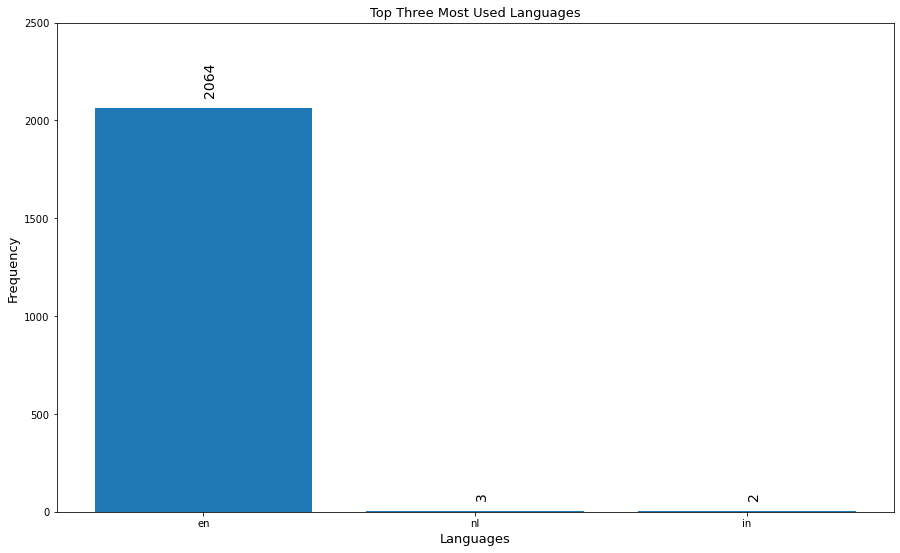

In [8]:
plt.bar(data=Top_Three_Lang, x='Language', height='Frequency',
                                        width=0.8)
plt.title('Top Three Most Used Languages', fontdict=dict(size=13))
plt.xlabel('Languages', fontdict=dict(size=13))
plt.ylabel('Frequency', fontdict=dict(size=13))
Outside_Annotator(Top_Three_Lang, 'Language', 'Frequency', 70)
plt.ylim(0, 2500)

<b>Getting the average favorite count for the top three languagues</b>

In [9]:
Top_Three_Favorite_Lang_List = master_data.groupby('lang').mean().round().favorite_count.loc[['en', 'nl', 'in']]

data = dict(Language= Top_Three_Favorite_Lang_List.index,
            Average_Favorite_Count=Top_Three_Favorite_Lang_List.values)
Top_Three_Favorite_Lang = pd.DataFrame(data=data)
Top_Three_Favorite_Lang

,Language,Average_Favorite_Count
0,en,8560.0
1,nl,753.0
2,in,28228.0


**<u>Plotting A Bar Chart With The Top Three Most Used Languages Against Their Average Favorite Count.</u>**

(0.0, 35000.0)

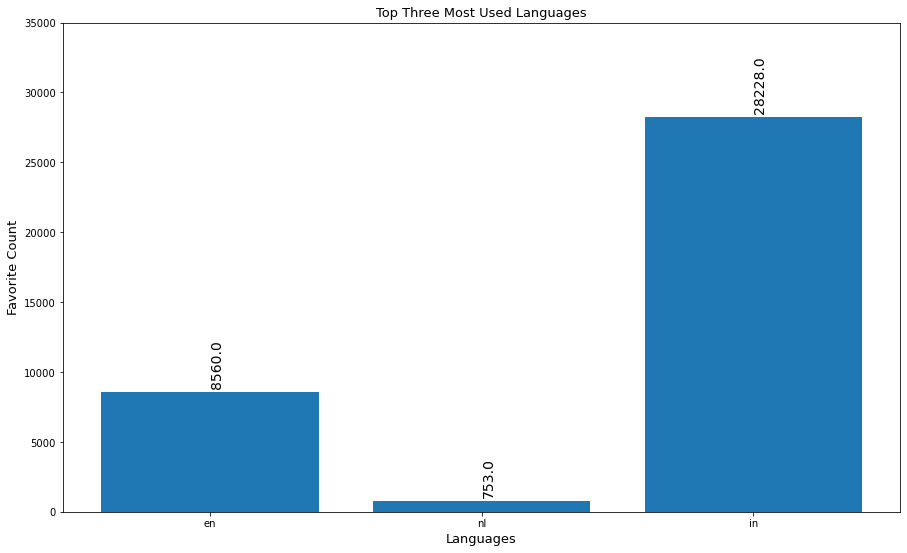

In [10]:
plt.bar(data=Top_Three_Favorite_Lang, x='Language', height='Average_Favorite_Count',
                                        width=0.8)
plt.title('Top Three Most Used Languages', fontdict=dict(size=13))
plt.xlabel('Languages', fontdict=dict(size=13))
plt.ylabel('Favorite Count', fontdict=dict(size=13))
Outside_Annotator(Top_Three_Favorite_Lang, 'Language', 'Average_Favorite_Count', 500)
plt.ylim(0, 35000)

Although English(en) is the most used language in our dataset, it is not the language with the highest average favorite count.<br>
From the graph above,there is not any significant correlation between the language and favorite column.

<b>2. What are the top 5 most common ratings?</b>

Table of top 5 most common ratings in our dataset.

In [11]:
data = dict(Rating= master_data['full_text_rating'].value_counts()[:5].index,
            Frequency=master_data['full_text_rating'].value_counts()[:5].values)

Top_Five_Rate = pd.DataFrame(data=data)
Top_Five_Rate

,Rating,Frequency
0,12/10,472
1,10/10,430
2,11/10,413
3,13/10,283
4,9/10,151


The most common rating in our dataset is 12/10 with a frequency of 472 and the rating 10/10 in second.

**<u>Plotting A Bar Chart With The Top Five Most Common Ratings And Their Frequencies.</u>**

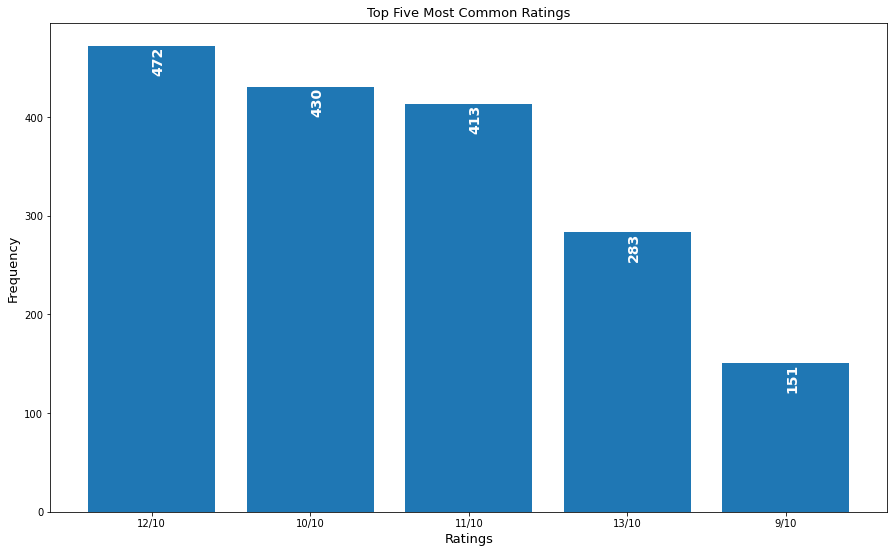

In [12]:
plt.bar(data=Top_Five_Rate, x='Rating', height='Frequency',
                                        width=0.8)
plt.title('Top Five Most Common Ratings', fontdict=dict(size=13))
plt.xlabel('Ratings', fontdict=dict(size=13))
plt.ylabel('Frequency', fontdict=dict(size=13))
Inside_Annotator(Top_Five_Rate, 'Rating', 'Frequency')

<b>Getting the average favorite count for top five most common ratings.</b>

In [13]:
Top_Five_Favorite_Rating_List = master_data.groupby('full_text_rating').mean().round().favorite_count.loc[['12/10', '10/10',
                                                                           '11/10', '13/10',
                                                                          '9/10']]

data = dict(Rating= Top_Five_Favorite_Rating_List.index,
            Average_Favorite_Count=Top_Five_Favorite_Rating_List.values)
Top_Five_Favorite_Rating = pd.DataFrame(data=data)
Top_Five_Favorite_Rating

,Rating,Average_Favorite_Count
0,12/10,10736.0
1,10/10,4082.0
2,11/10,6600.0
3,13/10,20919.0
4,9/10,2412.0


<b><u>Plotting A Bar Chart With The Top Five Most Commonly Used Ratings Against Their Average Favorite Count.</u></b>

(0.0, 26000.0)

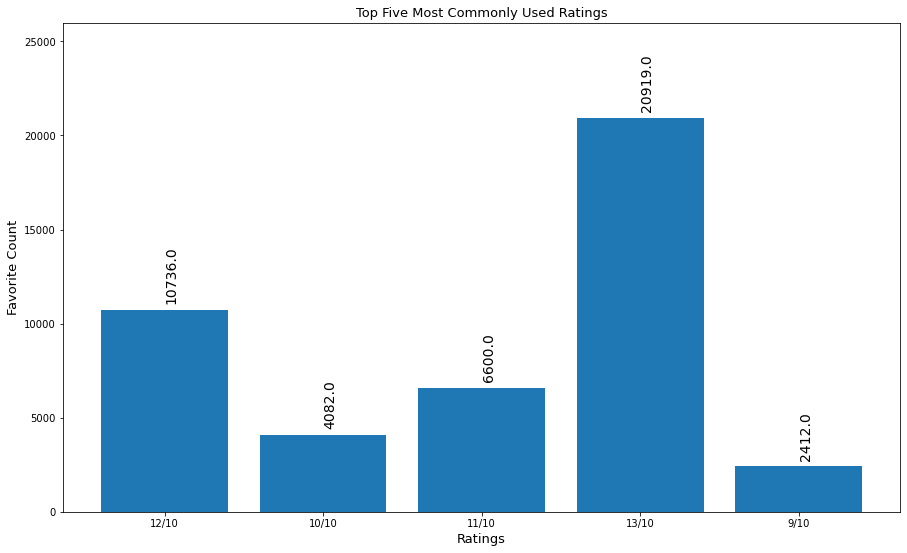

In [14]:
plt.bar(data=Top_Five_Favorite_Rating, x='Rating', height='Average_Favorite_Count',
                                        width=0.8)
plt.title('Top Five Most Commonly Used Ratings', fontdict=dict(size=13))
plt.xlabel('Ratings', fontdict=dict(size=13))
plt.ylabel('Favorite Count', fontdict=dict(size=13))
Outside_Annotator(Top_Five_Favorite_Rating, 'Rating', 'Average_Favorite_Count', 500)
plt.ylim(0, 26000)

The Rating with the highest favorite count in the top 5 most used ratings is the 13/10 rating with an average favorite count of 20,919.

<b>3. Which source text has the most retweets?</b>

In [15]:
data = dict(Source_text= master_data['source_text'].value_counts().index, Frequency = master_data['source_text'].value_counts().values)

Source_text = pd.DataFrame(data=data)
Source_text

,Source_text,Frequency
0,Twitter for iPhone,2030
1,Twitter Web Client,30
2,TweetDeck,11


The most common source text in our dataset is Twitter for iPhone with a frequency of 2030 and the source text Twitter Web Client in second.

<b><u>Plotting A Bar Chart With The Source Text And Their Frequencies.</u></b>

(0.0, 2250.0)

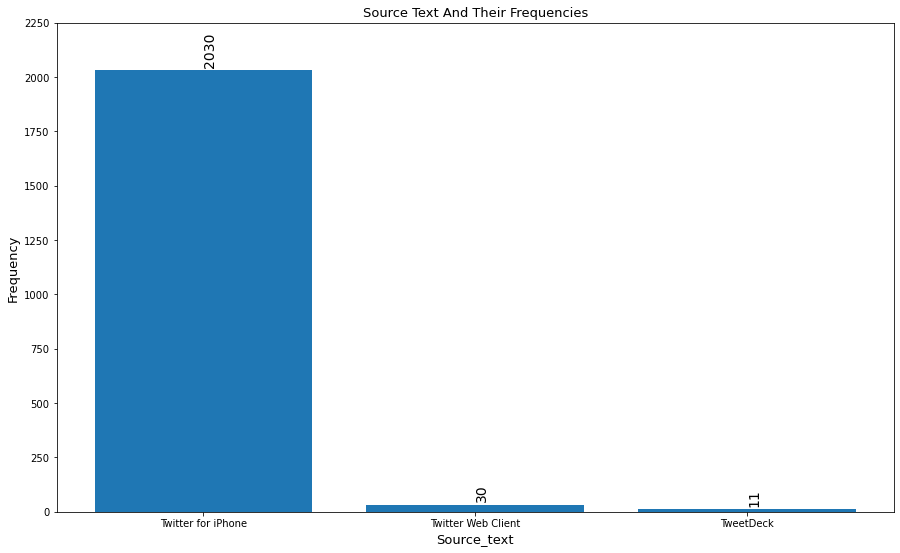

In [16]:
plt.bar(data=Source_text, x='Source_text', height='Frequency',
                                        width=0.8)
plt.title('Source Text And Their Frequencies', fontdict=dict(size=13))
plt.xlabel('Source_text', fontdict=dict(size=13))
plt.ylabel('Frequency', fontdict=dict(size=13))
Outside_Annotator(Source_text, 'Source_text', 'Frequency', 30)
plt.ylim(0, 2250)

Most of the tweets came for iPhones.

<b>4. How did the retweet count and favorite count improve over time?</b>

Table of the total retweet count and favorite count per year.

In [17]:
master_data['year'] = master_data['created_at'].apply(lambda x: x.year)
yearly_sum = master_data.groupby('year').sum()[['retweet_count', 'favorite_count']].reset_index()
yearly_sum

,year,retweet_count,favorite_count
0,2015,717925.0,1657008.0
1,2016,3001831.0,7510290.0
2,2017,2447286.0,8562491.0


<b><u>Plotting A Bar Chart Of The Retweet Count Against Year.</u></b>

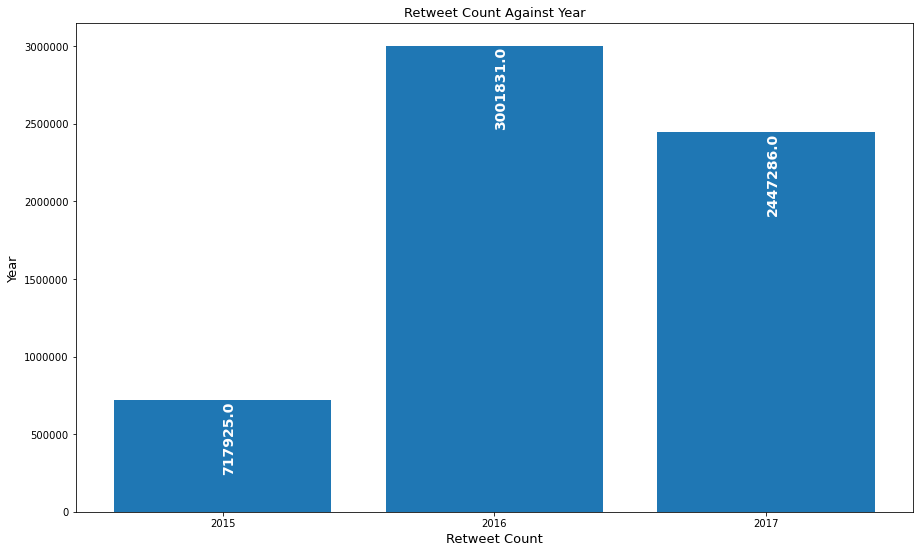

In [18]:
plt.bar(data=yearly_sum, x=yearly_sum.year, height=yearly_sum.retweet_count,
                                        width=0.8)
plt.title('Retweet Count Against Year', fontdict=dict(size=13))
plt.xlabel('Retweet Count', fontdict=dict(size=13))
plt.ylabel('Year', fontdict=dict(size=13))
plt.ticklabel_format(style='plain')
plt.xticks(yearly_sum.year)
Inside_Annotator(yearly_sum, 'year', 'retweet_count')

The total retweet count for the year 2016 is more than does of preceeding and following year.<br>
**Checking the numbers of tweets released yearly.**

In [19]:
master_data.groupby('year').count()[['retweet_count', 'favorite_count']]

,retweet_count,favorite_count
year,,
2015,665,665
2016,1020,1020
2017,386,386


There were more tweets released in 2016 than in the preceeding and following year.

<b><u>Plotting A Bar Chart Of The Favorite Count Against Year.</u></b>

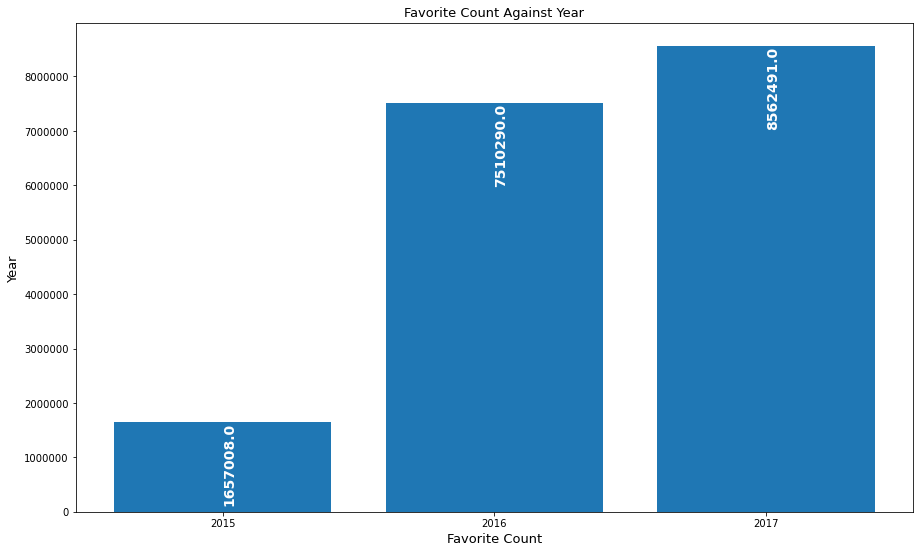

In [20]:
plt.bar(data=yearly_sum, x=yearly_sum.year, height=yearly_sum.favorite_count,
                                        width=0.8)
plt.title('Favorite Count Against Year', fontdict=dict(size=13))
plt.xlabel('Favorite Count', fontdict=dict(size=13))
plt.ylabel('Year', fontdict=dict(size=13))
plt.ticklabel_format(style='plain')
plt.xticks(yearly_sum.year)
Inside_Annotator(yearly_sum, 'year', 'favorite_count')

Although the year 2016 had more tweeted released than the year 2017, the year 2017 has the higher total favorite count. There has been a increase in the total favorite count from 2015 to 2017.

<b>5. What predicted breed of dog has the highest retweet count and favorite count?</b>

In [21]:
# Groups dataframe by Breed_of_Dogs and retweet count
breed_prediction = master_data.groupby('predicted_breed').mean().round()['retweet_count'].sort_values(ascending=False)[:10]

Data = dict(breed = breed_prediction.index, retweet_count = breed_prediction.values)
breed_prediction_df = pd.DataFrame(Data)
breed_prediction_df

,breed,retweet_count
0,Arabian_Camel,25446.0
1,Upright,18963.0
2,Prison,17053.0
3,Gondola,16814.0
4,Bubble,16159.0
5,Conch,15071.0
6,Revolver,14740.0
7,Remote_Control,14409.0
8,Beaver,13517.0
9,Angora,12984.0


<b><u>Plotting A Bar Chart Top Ten Breeds By Retweet Count.</u></b>

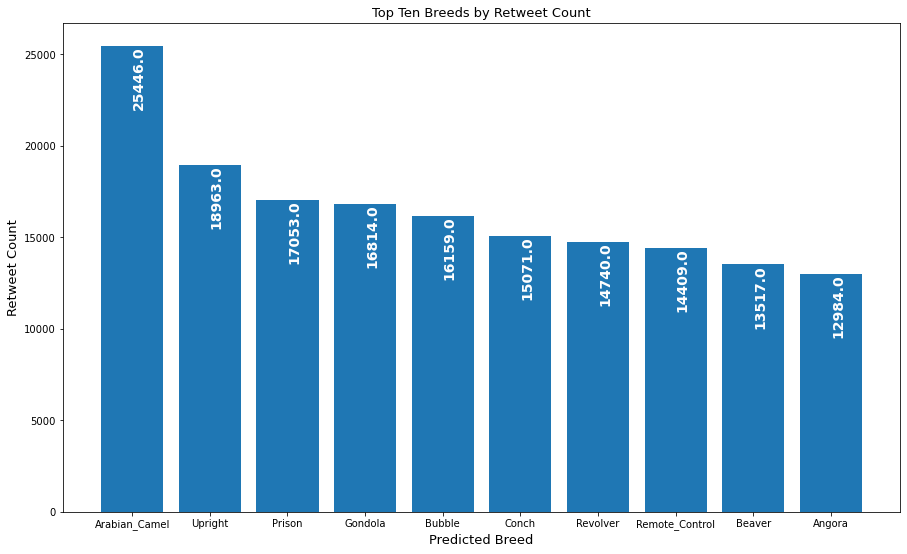

In [22]:
plt.bar(data=breed_prediction_df, x='breed', height='retweet_count',
                                        width=0.8)
plt.title('Top Ten Breeds by Retweet Count', fontdict=dict(size=13))
plt.xlabel('Predicted Breed', fontdict=dict(size=13))
plt.ylabel('Retweet Count', fontdict=dict(size=13))
Inside_Annotator(breed_prediction_df, 'breed', 'retweet_count')

The predicted breed with the highest retweet count is the Arabian_Camel with a retweet count of 25,446.

In [23]:
# Groups dataframe by Breed_of_Dogs and retweet count
breed_prediction_favorite = master_data.groupby('predicted_breed').mean().round()['favorite_count'].sort_values(ascending=False)[:10]

Data = dict(breed = breed_prediction_favorite.index, favorite_count = breed_prediction_favorite.values)
breed_prediction_favorite = pd.DataFrame(Data)
breed_prediction_favorite

,breed,favorite_count
0,Limousine,46959.0
1,Orange,39467.0
2,Angora,37892.0
3,Revolver,35553.0
4,Barbell,35325.0
5,Basketball,35324.0
6,Bubble,34349.0
7,Quilt,33689.0
8,Pole,33651.0
9,Fountain,32617.0


<b><u>Plotting A Bar Chart Top Ten Breeds By Favorite Count.</u></b>

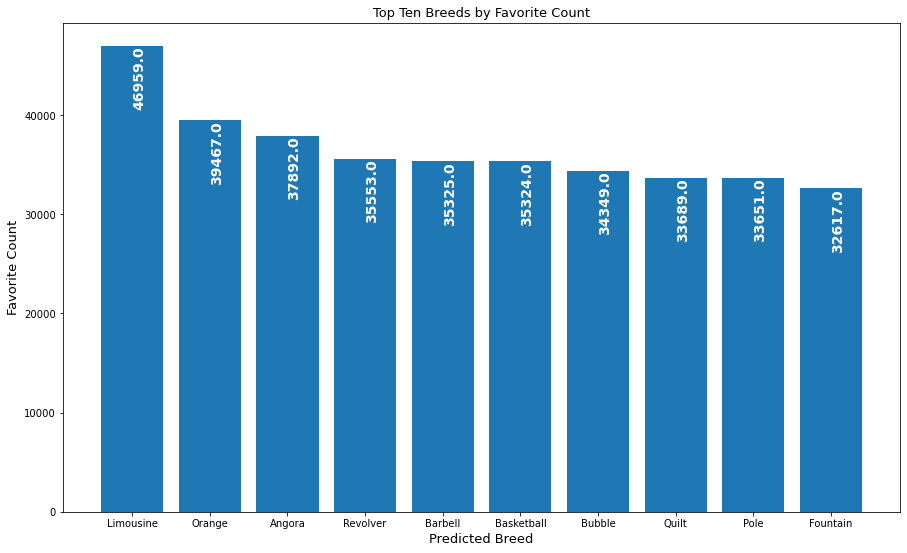

In [24]:
plt.bar(data=breed_prediction_favorite, x='breed', height='favorite_count',
                                        width=0.8)
plt.title('Top Ten Breeds by Favorite Count', fontdict=dict(size=13))
plt.xlabel('Predicted Breed', fontdict=dict(size=13))
plt.ylabel('Favorite Count', fontdict=dict(size=13))
Inside_Annotator(breed_prediction_favorite, 'breed', 'favorite_count')

There is an error with the prediction model, some of the items are not even breeds of dogs.

<b>6. Does the an increase in the text length lead to an increase in retweet count and favourite count?</b>

<b><u>Plotting A Histogram Showing The Distribution Of The Display_text_length Field.</u></b>

Text(0.5, 1.0, 'Distribution of Display Text Length Field')

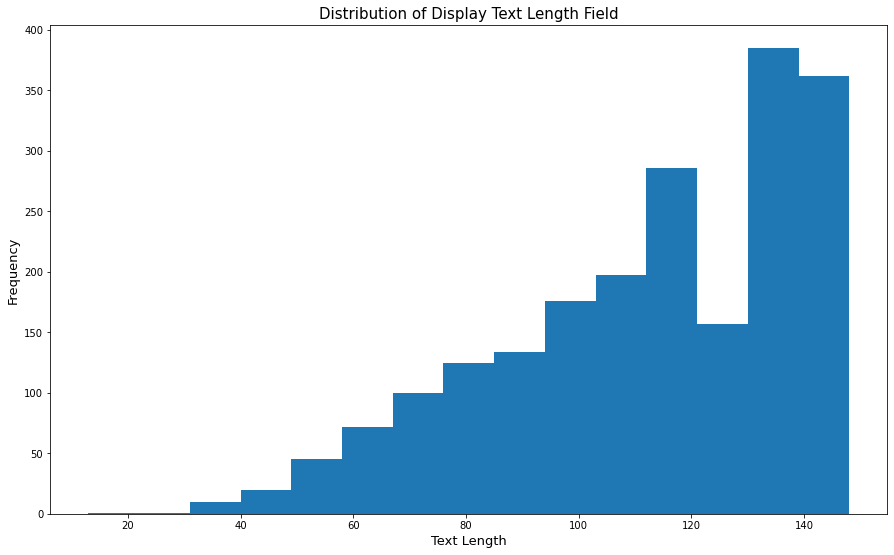

In [25]:
plt.hist(master_data['display_text_length'], bins=15)
plt.xlabel('Text Length', fontdict=dict(size=13))
plt.ylabel('Frequency', fontdict=dict(size=13))
plt.title("Distribution of Display Text Length Field", fontdict=dict(size=15))

In the graph above, we can determine that the display_text_length field is left-skewed and in addition to that, most tweets are between 80 to 150 characters long.

<b><u>Plotting A Histogram Showing The Distribution Of The Retweet_count and Favorite_count Fields.</u></b>

Text(0.5, 1.0, 'Distribution of The Retweet Count and Favorite Count Fields.')

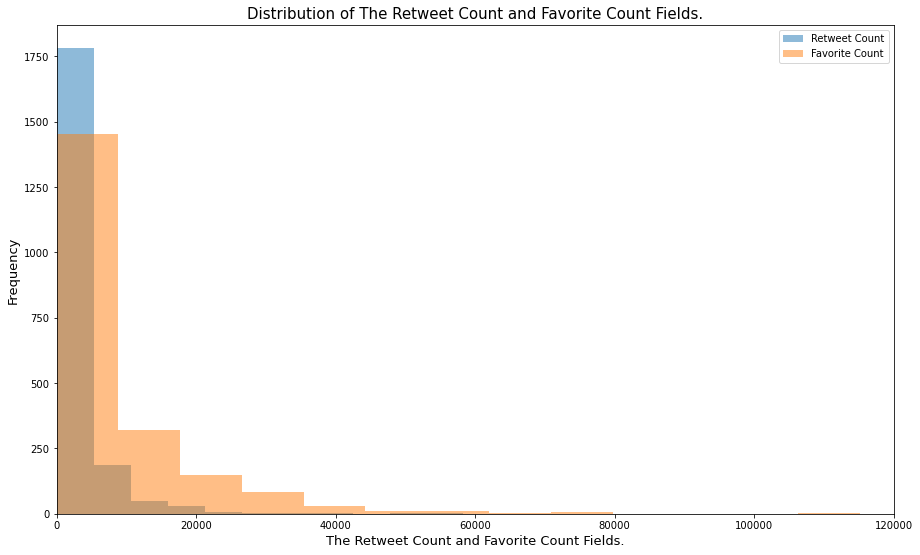

In [26]:
plt.hist(master_data['retweet_count'], bins=15, alpha=0.5, label='Retweet Count')
plt.hist(master_data['favorite_count'], bins=15, alpha=0.5, label='Favorite Count')
plt.xlabel('The Retweet Count and Favorite Count Fields.', fontdict=dict(size=13))
plt.ylabel('Frequency', fontdict=dict(size=13))
plt.legend(loc="upper right")
plt.xlim(0, 120000)
plt.title("Distribution of The Retweet Count and Favorite Count Fields.", fontdict=dict(size=15))

From the graph above, it is clear to see that both the retweet and the favorite count fields are right skewed.
Most tweet in our dataset have a retweet count below 10000, something similar can be said about the favorite count columns where most tweets have a favorite count of below 20000 with quite a couple of outliers.

<b><u>Plotting A Scatterplot Of Retweet Count Column Against The Text Length Column</u></b>

Text(0, 0.5, 'Retweet Count')

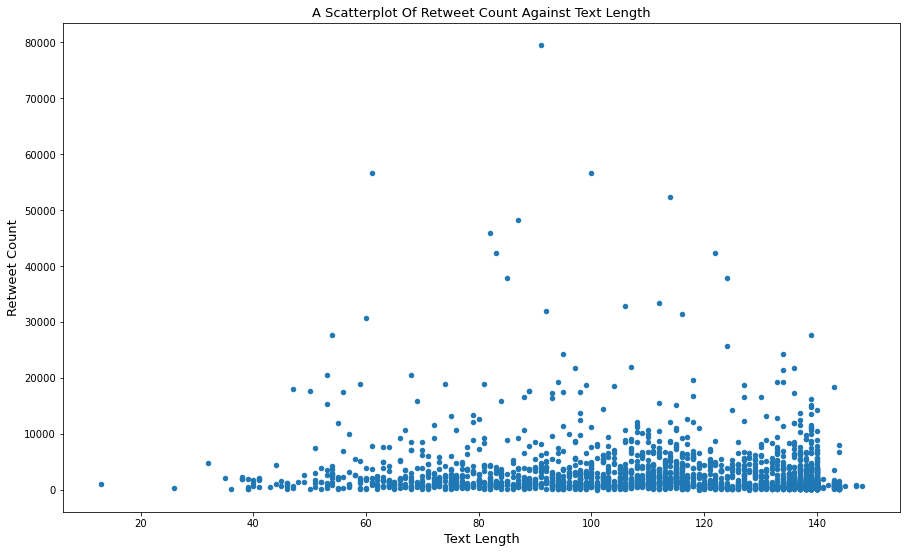

In [27]:
master_data.plot(kind='scatter',
        x='display_text_length',
        y='retweet_count')
plt.title('A Scatterplot Of Retweet Count Against Text Length', fontdict=dict(size=13))
plt.xlabel('Text Length', fontdict=dict(size=13))
plt.ylabel('Retweet Count', fontdict=dict(size=13))

The text_length column is slightly correlated to the retweeted column.

<b><u>Plotting A Scatterplot Of The Favourite Count Against The Text Length </u></b>

Text(0, 0.5, 'Favorite Count')

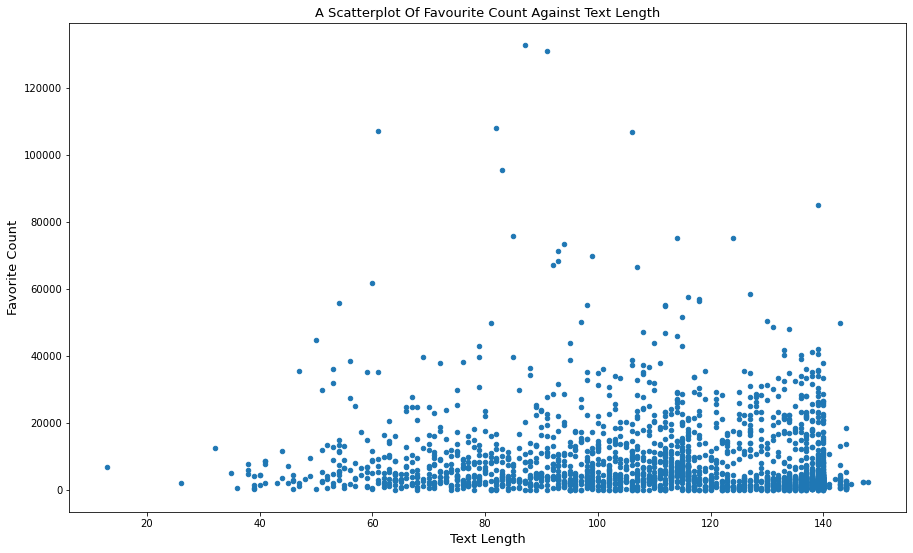

In [28]:
master_data.plot(kind='scatter',
        x='display_text_length',
        y='favorite_count')
plt.title('A Scatterplot Of Favourite Count Against Text Length', fontdict=dict(size=13))
plt.xlabel('Text Length', fontdict=dict(size=13))
plt.ylabel('Favorite Count', fontdict=dict(size=13))

The text_length column is slightly correlated to the favorite column. Most tweets with a text length of between 40 to 140 characters have a higher favorite column value.

## Conclusions
This study through a large dataset has allowed me to come to a few conclusions, which are:
- The most used language in our dataset is `english(en)` which was used in over `99` percent of the tweets.

- The most common rating in our dataset is `12/10` with a frequency of `472` and the rating `10/10` in second.

- The higher the rating numerator value and the favorite count are highly correlated.

- The most common source text in our dataset is the `Twitter for iPhone` source text with a frequency of `2030` and the source text `Twitter Web Client` in second.

- The total retweet count for the year `2016` is more than does of preceeding and following year.

- The predicted breed with the highest retweet count is the `Arabian_Camel` with a retweet count of `25,446`.

- The display_text_length field is left-skewed and most tweets are between `80 to 150` characters long.

- Most tweets in our dataset have a retweet count below `10,000` and a favorite count of below `20,000`.

- The text_length column is slightly correlated to the favorite column.

#### <u>Limitations</u>
- The WeRateDogs Dataset does not contain some fields that could have potentially offered more insight to the relationship between popularity, runtime and profit.

- The total favorite count from `2015` to `2016` increased drastically, there was not any data that could shine any light on the reasons for this.

- The Image prediction models gave wrong predictions.